In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [3]:
x = california.data
y = california.target

**조건** : Functional API

1. training set / validation set / test set 분리
2. hidden layer 최소 3개 사용 (노드 수 자율)
3. early stopping 적용 (patiece = 7)
4. validation_data 옵션에 validation set 적용

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = california.data
y = california.target
x.shape, y.shape

((20640, 8), (20640,))

In [6]:
y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [7]:
# train, test set 분리
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [8]:
# train, validation set 분리
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=1)
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((13209, 8), (3303, 8), (13209,), (3303,))

In [9]:
# Functional API

# 1. 세션 클리어
keras.backend.clear_session()

# 2. 연결
il = keras.layers.Input(shape=(8, ))
hl1 = keras.layers.Dense(512, activation='relu')(il)
hl2 = keras.layers.Dense(512, activation='relu')(hl1)
hl3 = keras.layers.Dense(512, activation='relu')(hl2)
ol = keras.layers.Dense(1)(hl3)

# 3. 모델 선언
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(loss='mse', optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 530,433
Trainable params: 530,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
es = EarlyStopping(
    monitor='val_loss',
    patience=7,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=50, callbacks=[es])

Epoch 1/50
413/413 [==============================] - 10s 8ms/step - loss: 232.9604 - val_loss: 1.1821
Epoch 2/50
413/413 [==============================] - 2s 4ms/step - loss: 4.7016 - val_loss: 3.7650
Epoch 3/50
413/413 [==============================] - 2s 4ms/step - loss: 2.2965 - val_loss: 0.9142
Epoch 4/50
413/413 [==============================] - 2s 4ms/step - loss: 1.1076 - val_loss: 1.3874
Epoch 5/50
413/413 [==============================] - 2s 4ms/step - loss: 3.5521 - val_loss: 0.8591
Epoch 6/50
413/413 [==============================] - 2s 4ms/step - loss: 1.1032 - val_loss: 0.8076
Epoch 7/50
413/413 [==============================] - 2s 4ms/step - loss: 1.5472 - val_loss: 1.2066
Epoch 8/50
413/413 [==============================] - 2s 5ms/step - loss: 0.9869 - val_loss: 0.8150
Epoch 9/50
413/413 [==============================] - 1s 4ms/step - loss: 0.9159 - val_loss: 0.6263
Epoch 10/50
413/413 [==============================] - 1s 4ms/step - loss: 0.6827 - val_loss: 0.7

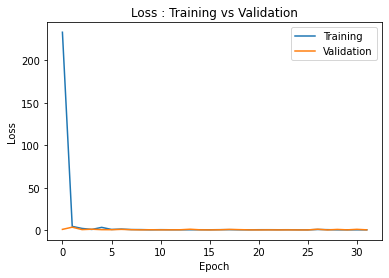

In [12]:
import matplotlib.pyplot as plt

if not isinstance(history, dict):
    history = history.history

# plt.subplot(2, 1, 1)
# plt.plot(history['accuracy'])
# plt.plot(history['val_accuracy'])
# plt.title('Accuracy : Training vs Validation')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc=0)

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [13]:
y_pred = model.predict(test_x)
y_pred[:5]

129/129 [==============================] - 0s 2ms/step


array([[2.2152245],
       [1.3903991],
       [2.212529 ],
       [1.2286935],
       [2.9119987]], dtype=float32)

In [14]:
test_y[:5]

array([3.55 , 0.707, 2.294, 1.125, 2.254])